- [Milistone 1 EDA](#Mili-1-1-Nada)
- [Milistone 1 Preprocessing](#Mili-1-2-AbdelRahman)
- [Milistone 2 Model Builder](#Mili-2-1-Yakoot)

## Milistone 1 Part 1 (Nada) <a id='Mili-1-1-Nada'></a>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [3]:
df = pd.concat(
    [
        pd.read_csv('D:\coding\Final-project-DEPI\Data\customer_churn_dataset-training-master.csv'), 
        pd.read_csv('D:\coding\Final-project-DEPI\Data\customer_churn_dataset-testing-master.csv')
    ], 
    axis=0)
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.shape

(505207, 12)

In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [7]:
for column in df.columns:
    print(column, df[column].unique())

CustomerID [2.0000e+00 3.0000e+00 4.0000e+00 ... 6.4359e+04 6.4363e+04 6.4371e+04]
Age [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62. nan]
Gender ['Female' 'Male' nan]
Tenure [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36. nan]
Usage Frequency [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10. nan]
Support Calls [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8. nan]
Payment Delay [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19. nan]
Subscription Type ['Standard' 'Basic' 'Premium' nan]
Contract Length ['Annua

In [8]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [9]:
df[df["Age"].isnull()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df = df.drop(["CustomerID"], axis=1)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [14]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505206 non-null  float64
 1   gender             505206 non-null  object 
 2   tenure             505206 non-null  float64
 3   usage_frequency    505206 non-null  float64
 4   support_calls      505206 non-null  float64
 5   payment_delay      505206 non-null  float64
 6   subscription_type  505206 non-null  object 
 7   contract_length    505206 non-null  object 
 8   total_spend        505206 non-null  float64
 9   last_interaction   505206 non-null  float64
 10  churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,505206.0,39.704172,12.670577,18.0,29.0,40.0,49.0,65.0
tenure,505206.0,31.350435,17.237482,1.0,16.0,32.0,46.0,60.0
usage_frequency,505206.0,15.714825,8.619323,1.0,8.0,16.0,23.0,30.0
support_calls,505206.0,3.833317,3.133603,0.0,1.0,3.0,6.0,10.0
payment_delay,505206.0,13.496843,8.451187,0.0,6.0,13.0,20.0,30.0
total_spend,505206.0,620.072766,245.319256,100.0,446.0,648.9,824.0,1000.0
last_interaction,505206.0,14.610581,8.608286,1.0,7.0,14.0,22.0,30.0
churn,505206.0,0.555203,0.496944,0.0,0.0,1.0,1.0,1.0


In [17]:
df.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [18]:
descrete_col = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in descrete_col:
    df[col] = df[col].astype(int)
df

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1
...,...,...,...,...,...,...,...,...,...,...,...
505202,45,Female,33,12,6,21,Basic,Quarterly,947.0,14,1
505203,37,Male,6,1,5,22,Standard,Annual,923.0,9,1
505204,25,Male,39,14,8,30,Premium,Monthly,327.0,20,1
505205,50,Female,18,19,7,22,Standard,Monthly,540.0,13,1


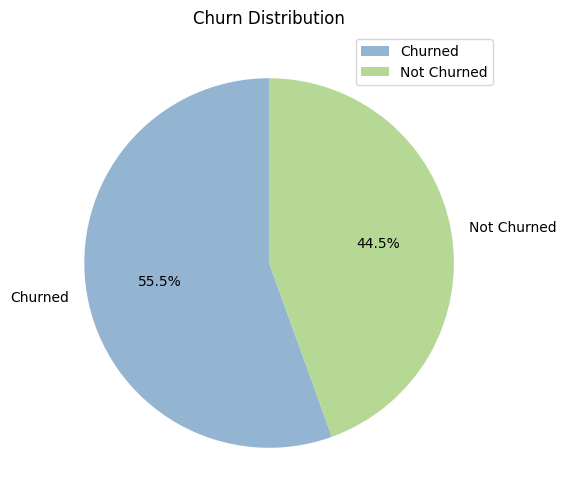

In [19]:
counts = [int(df['churn'].sum()), int((df['churn'] == 0).sum())]
labels = ["Churned", "Not Churned"]

plt.figure(figsize=(6, 6))
plt.pie(
    counts, labels=labels, colors=["#94b5d2", "#b6d895"], autopct="%1.1f%%", startangle=90
)
plt.title("Churn Distribution")
plt.legend()
plt.show()

Class Imbalance Report
The target variable (Churn) is imbalanced:

No (did not churn): ~44.5%
Yes (churned): ~55.5%
by analysing the target variable (Churn) we can see that most customers of our shop are churning!
This imbalance indicates that the dataset is skewed towards the "yes" class, which may bias the model to predict "yes" more frequently.
We will handle this imbalance later during the modeling stage using techniques such as resampling (e.g., SMOTE) or adjusting class weights.

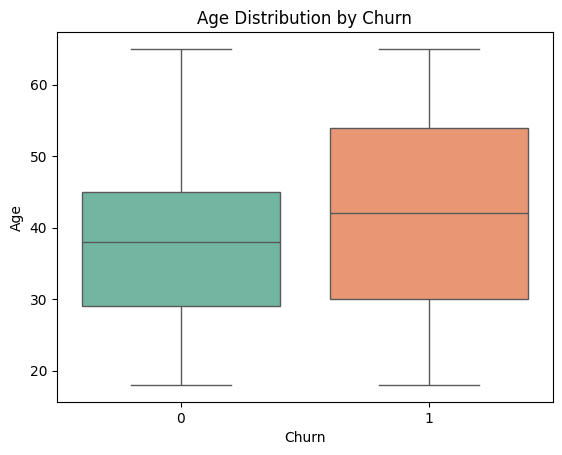

In [20]:
sns.boxplot(x="churn", y="age", data=df, palette="Set2")
plt.xlabel("Churn")
plt.ylabel("Age")
plt.title("Age Distribution by Churn")
plt.show()

🔹 Age Distribution by Churn (Boxplot)

The boxplot shows the distribution of customer ages across churn status.

Non-churned customers (0) have a median age around 37 years, with a narrower spread (mostly below 50).

Churned customers (1) have a slightly higher median age (~41 years) and a wider spread (18–65).

This indicates that churn likelihood increases with age, especially for customers over 50.

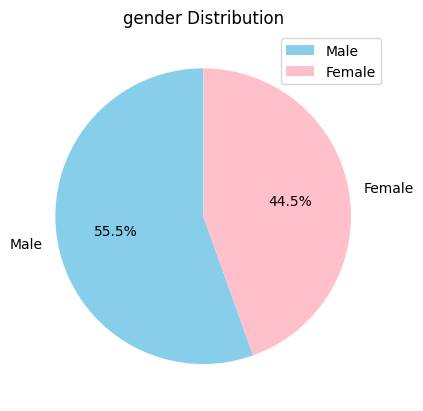

In [21]:
# Gender Analysis:
gender = df["gender"].value_counts().values
label = df["gender"].value_counts().index
plt.pie(
    gender, labels=label, colors=["skyblue", "pink"], autopct="%1.1f%%", startangle=90
)
plt.title("gender Distribution")
plt.legend()
plt.show()

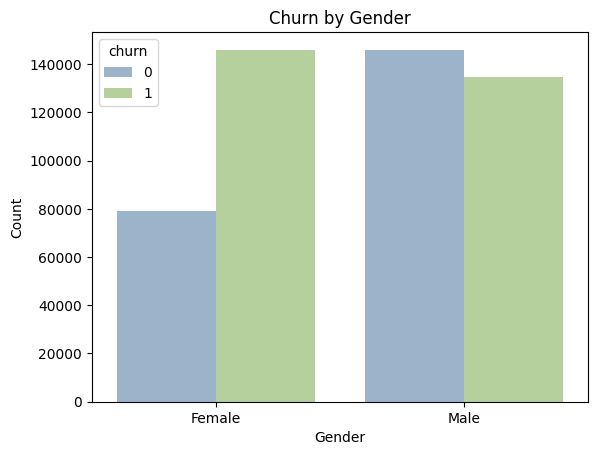

In [22]:
sns.countplot(x="gender", hue="churn", data=df, palette=["#94b5d2", "#b6d895"])
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

More than half of the customers are Male

BUT The churn rate of the female customers are much higher than the male customers

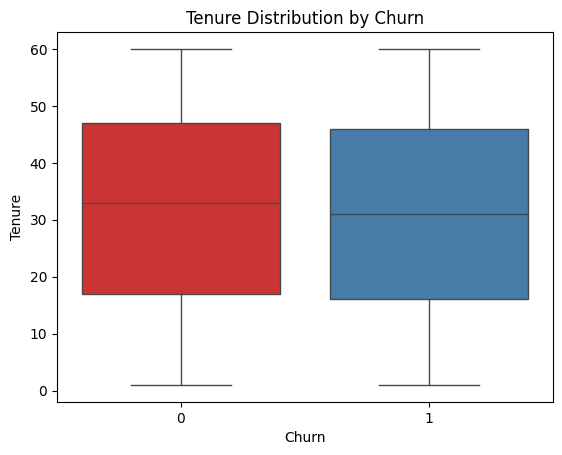

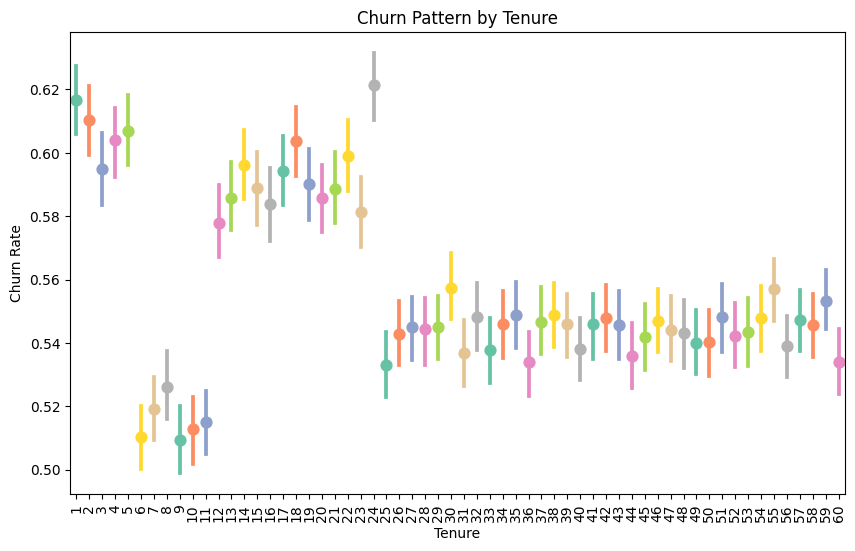

In [23]:
# 3.Tenure and Churn:
sns.boxplot(x="churn", y="tenure", data=df, palette="Set1")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.title("Tenure Distribution by Churn")
plt.show()

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x="tenure", y="churn", palette="Set2")
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.title("Churn Pattern by Tenure")
plt.xticks(rotation=90)
plt.show()

we can see that we have custmores with almost equally distributed Tenures

the churn rate in new customers(1-5 tenure) and 12 to 24 month tenure is higher than others


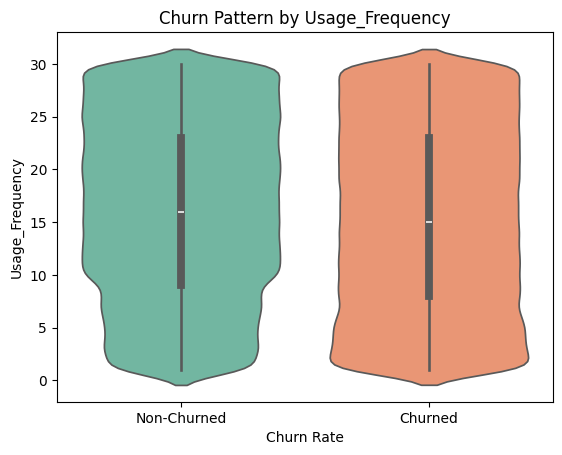

In [24]:
# 4.Usage Frequency:
sns.violinplot(data=df, x="churn", y="usage_frequency", palette="Set2")
plt.xlabel("Churn Rate")
plt.ylabel("Usage_Frequency")
plt.title("Churn Pattern by Usage_Frequency")
plt.xticks([0, 1], ["Non-Churned", "Churned"])
plt.show()

"The violin plot shows that customers with low usage frequency (0–10) are more likely to chur. However, for customers with higher usage frequency (15–30), the churn and non-churn distributions are more balanced.

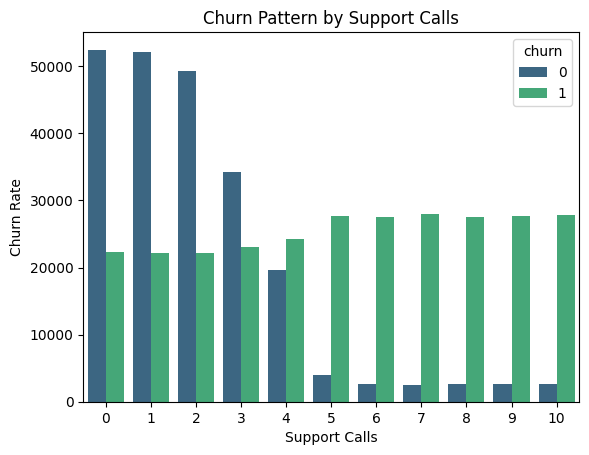

In [25]:
# 5.Support Calls and Churn :
sns.countplot(data=df, x="support_calls", hue="churn", palette="viridis")
plt.xlabel("Support Calls")
plt.ylabel("Churn Rate")
plt.title("Churn Pattern by Support Calls")
plt.show()

As the number of support calls increases, the churn rate rises significantly. Customers who make more than 5 calls almost always churn, which indicates potential issues with the effectiveness of customer support.

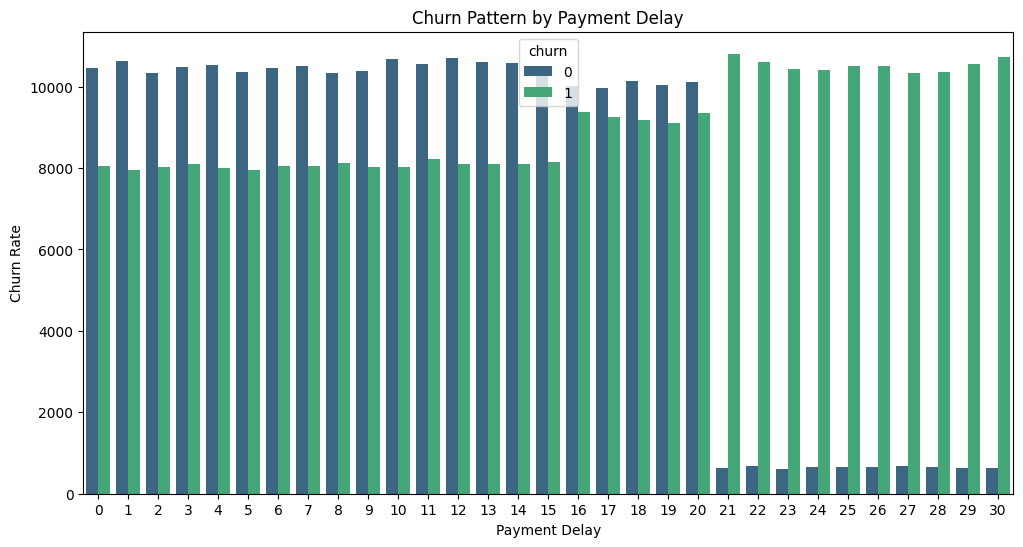

In [26]:
# 6.Payment Delay :
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="payment_delay", hue="churn", palette="viridis")
plt.xlabel("Payment Delay")
plt.ylabel("Churn Rate")
plt.title("Churn Pattern by Payment Delay")
plt.show()

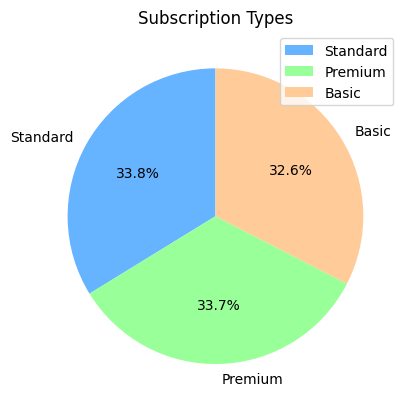

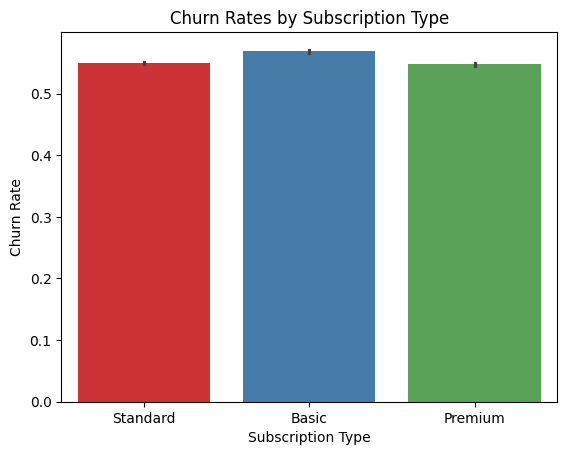

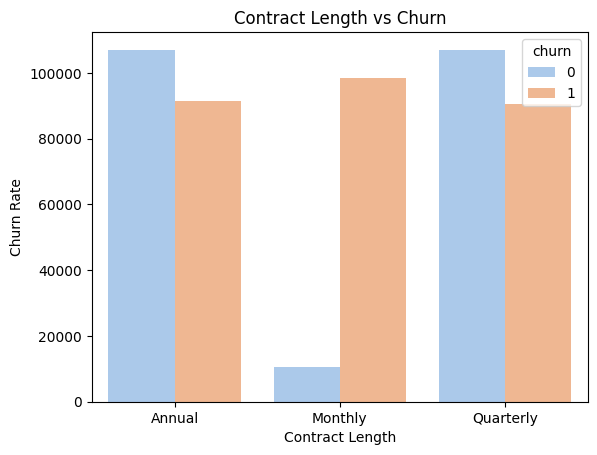

In [27]:
# 7.Subscription Type and Contract Length
subscription = df["subscription_type"].value_counts()
plt.pie(
    x=subscription.values,
    labels=subscription.index,
    autopct="%1.1f%%",
    colors=["#66b3ff", "#99ff99", "#ffcc99"],
    startangle=90,
)
plt.title("Subscription Types")
plt.legend()
plt.show()

sns.barplot(data=df, x="subscription_type", y="churn", palette="Set1")
plt.xlabel("Subscription Type")
plt.ylabel("Churn Rate")
plt.title("Churn Rates by Subscription Type")
plt.show()

sns.countplot(data=df, x="contract_length", hue="churn", palette="pastel")
plt.xlabel("Contract Length")
plt.ylabel("Churn Rate")
plt.title("Contract Length vs Churn")
plt.show()


The subscription types have nearly equal proportions in the data.
The churn rate across the subscription types is also almost equal, although the Basic plan shows a slightly higher churn rate compared to the others.
almost half of customers with annual and quarterly contracts churn, but customers with monthly contracts all churn



In [28]:
df.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


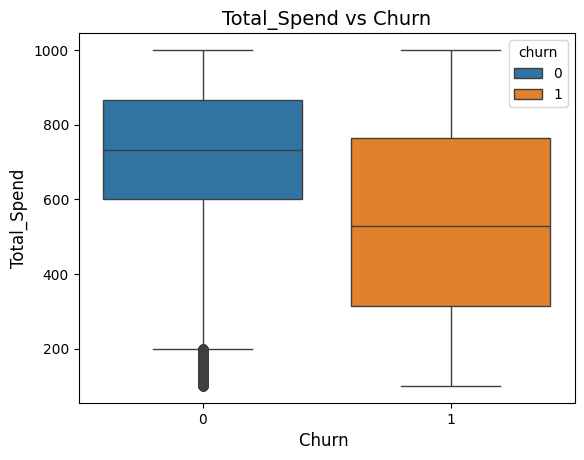

In [29]:
# 8.Total Spend and Churn
sns.boxplot(data=df, x="churn", y="total_spend", hue="churn")
plt.title("Total_Spend vs Churn", fontsize=14)
plt.xlabel("Churn ", fontsize=12)
plt.ylabel("Total_Spend", fontsize=12)
plt.show()

most customers with who spend more than 600$ tend not to churn



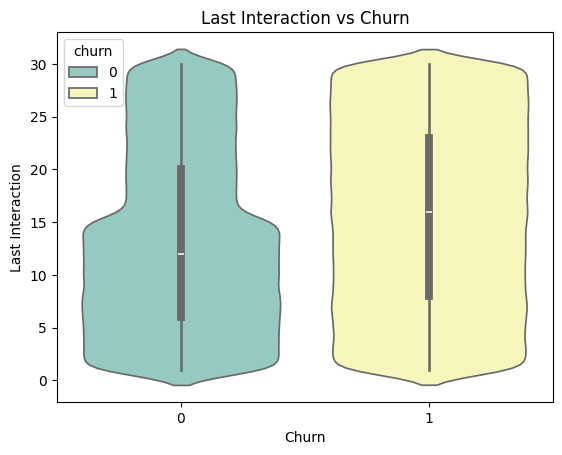

In [30]:
# 9.Last Interaction
sns.violinplot(x="churn", y="last_interaction", data=df, palette="Set3", hue="churn")
plt.xlabel("Churn")
plt.ylabel("Last Interaction")
plt.title("Last Interaction vs Churn")
plt.show()

Customers with fewer recent interactions are more likely to churn.

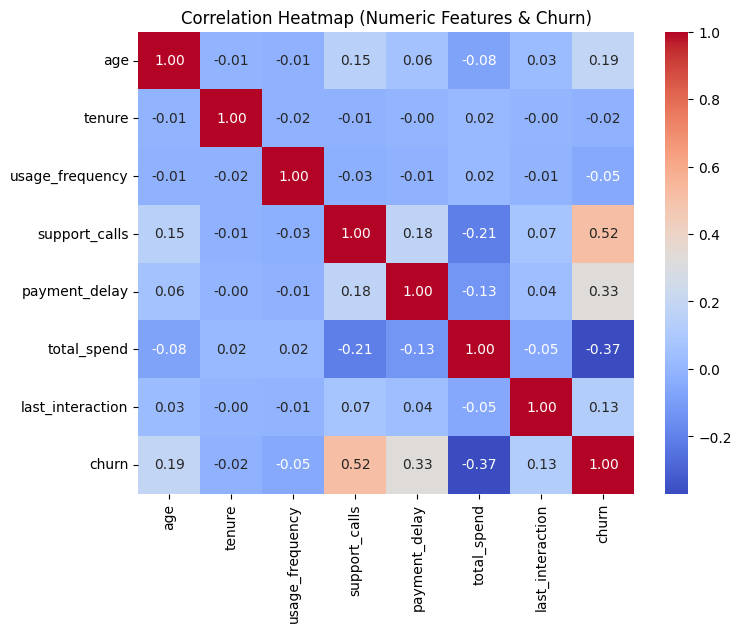

In [31]:
# 11.Correlations
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features & Churn)")
plt.show()


“Churn is strongly associated with higher support calls and payment delays, while higher total spend reduces churn likelihood.”

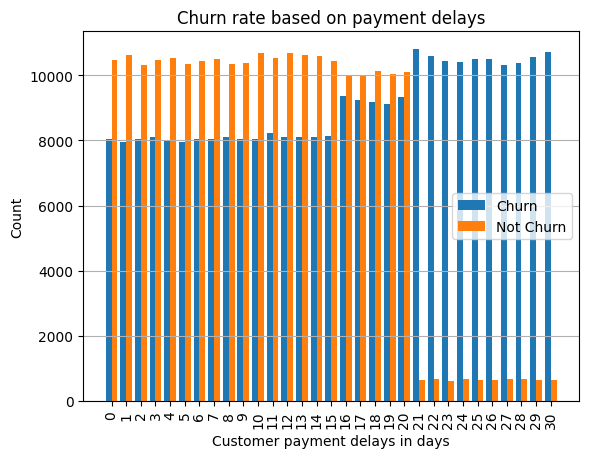

In [32]:
filtered = df.groupby(['payment_delay', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style='background-color: white; color: black; padding: 3%'>=> Customers who are not churned tend to have higher payment delay days as compared with churned customers till day 20, after which churned customers have payment delays just over 10 times than that of not churned customers.</div>

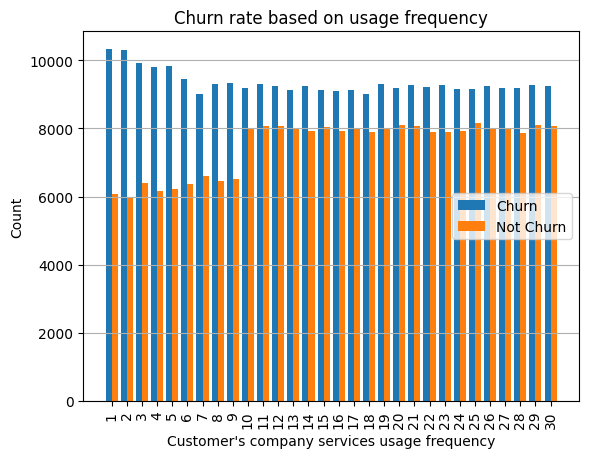

In [33]:
filtered = df.groupby(['usage_frequency', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style='background-color: white; color: black; padding: 3%'>=> Churned customer tend to use company's services significantly more than customers who are not churned.</div>

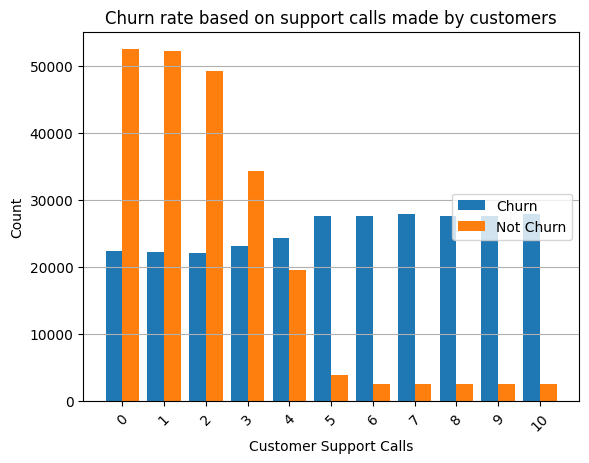

In [34]:
filtered = df.groupby(['support_calls', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style='background-color: white; color: black; padding: 3%'>=> Yes, customers with more support calls tend to churn more. <br><br>On the contrary, customers who are not churned tend to make much more 0 to 3 customer support calls than churned customers, after which churned customers make significantly more calls.</div>

# Milistone 1 part2 (Abdelrahman) <a id='Mili-1-2-AbdelRahman'></a>

In [35]:
y = df['churn']
X = df.drop(columns='churn')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Reset the index of the resulting DataFrames
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [37]:
X_train

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,19,Female,48,7,3,30,Premium,Annual,787.00,29
1,65,Female,11,20,9,14,Standard,Monthly,562.00,13
2,38,Male,8,20,1,4,Basic,Quarterly,961.86,8
3,38,Female,59,25,10,4,Premium,Annual,706.00,14
4,46,Male,38,24,10,16,Standard,Annual,260.00,25
...,...,...,...,...,...,...,...,...,...,...
404159,24,Female,1,4,2,18,Standard,Quarterly,740.72,15
404160,62,Male,29,23,9,24,Standard,Quarterly,327.10,11
404161,34,Male,13,16,1,6,Premium,Quarterly,520.36,23
404162,35,Male,23,18,4,10,Standard,Monthly,420.00,3


In [38]:
encoder = OneHotEncoder(sparse_output=False)

encoder.fit(X_train[['gender', 'subscription_type', 'contract_length']])

OneHotEncoder(sparse_output=False)

In [39]:
feature_names = encoder.get_feature_names_out(['gender', 'subscription_type', 'contract_length'])
feature_names

array(['gender_Female', 'gender_Male', 'subscription_type_Basic',
       'subscription_type_Premium', 'subscription_type_Standard',
       'contract_length_Annual', 'contract_length_Monthly',
       'contract_length_Quarterly'], dtype=object)

In [40]:
train_categorical_one_encoded_data = encoder.transform(X_train[['gender', 'subscription_type', 'contract_length']])
train_OHE_df = pd.DataFrame(train_categorical_one_encoded_data, columns=feature_names)

test_categorical_one_encoded_data = encoder.transform(X_test[['gender', 'subscription_type', 'contract_length']])
test_OHE_df = pd.DataFrame(test_categorical_one_encoded_data, columns=feature_names)

In [41]:
X_train = X_train.drop(columns=['gender', 'subscription_type', 'contract_length'])
X_test = X_test.drop(columns=['gender', 'subscription_type', 'contract_length'])

In [42]:
X_train = pd.concat([X_train, train_OHE_df], axis=1)
X_test = pd.concat([X_test, test_OHE_df], axis=1)

In [43]:
X_test.head()

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,58,2,20,6,24,664.00,20,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,52,14,13,2,13,650.00,9,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,46,38,3,0,9,571.47,24,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,29,59,27,5,22,502.00,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,42,29,7,1,20,541.34,10,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [44]:
# Saving the encoder to a file
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [46]:
data = {
    'Feature_1': X_pca[:, 0],
    'Feature_2': X_pca[:, 1],
    'Target': y_train
}

pca_df = pd.DataFrame(data)
pca_df

,Feature_1,Feature_2,Target
0,166.666719,16.831219,1
1,-58.457548,-20.683890,0
2,341.575218,-23.661122,0
3,85.736400,27.466815,1
4,-360.378519,6.762457,1
...,...,...,...
404159,120.403395,-30.069073,0
404160,-293.360318,-2.462884,1
404161,-99.932907,-18.172059,0
404162,-200.272137,-8.057019,1


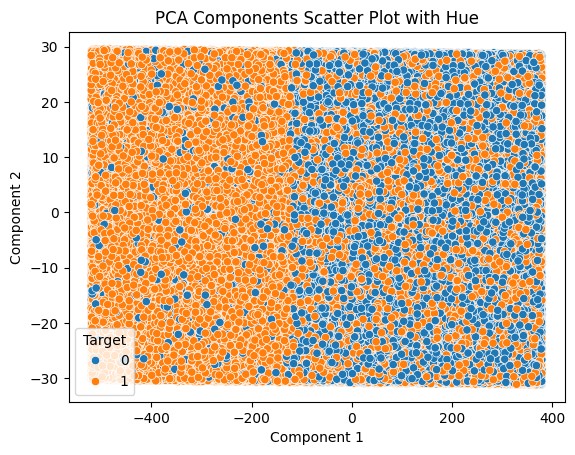

In [47]:
sns.scatterplot(data=pca_df, x='Feature_1', y='Feature_2', hue='Target')

# Set plot labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Components Scatter Plot with Hue')

# Show the plot
plt.legend(title='Target')
plt.show()

# Milistone 2 Part 1 <a id='Mili-2-1-Yakoot'></a>

## Logistic Regression Model

In [48]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=23)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [49]:
# Calculate evaluation metrics
from sklearn.metrics import f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display metrics
print("=" * 50)
print("Logistic Regression Model Performance")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print("=" * 50)

Logistic Regression Model Performance
Accuracy:  0.8467
Precision: 0.8741
Recall:    0.8467
F1-Score:  0.8602
ROC-AUC:   0.9077


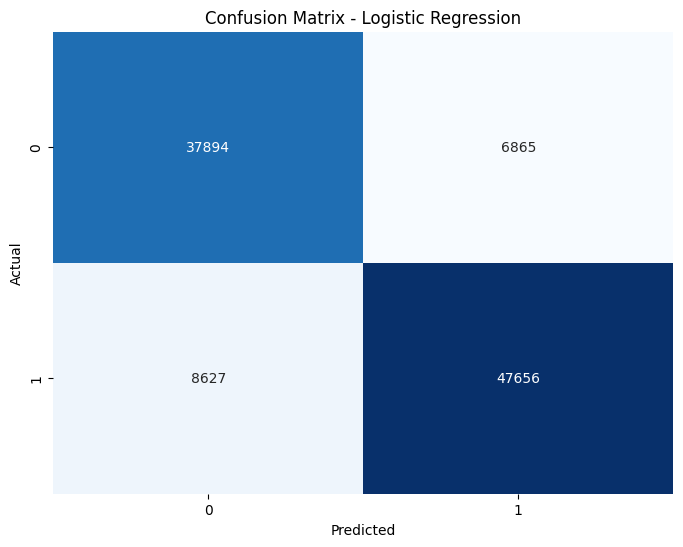


Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.81      0.85      0.83     44759
     Churned       0.87      0.85      0.86     56283

    accuracy                           0.85    101042
   macro avg       0.84      0.85      0.85    101042
weighted avg       0.85      0.85      0.85    101042



In [50]:
# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

## Random Forest

In [51]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [52]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [53]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

In [54]:
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")


Accuracy: 0.9352
Precision: 0.8978
Recall: 0.9972
F1-score: 0.9449
ROC-AUC Score: 0.9533


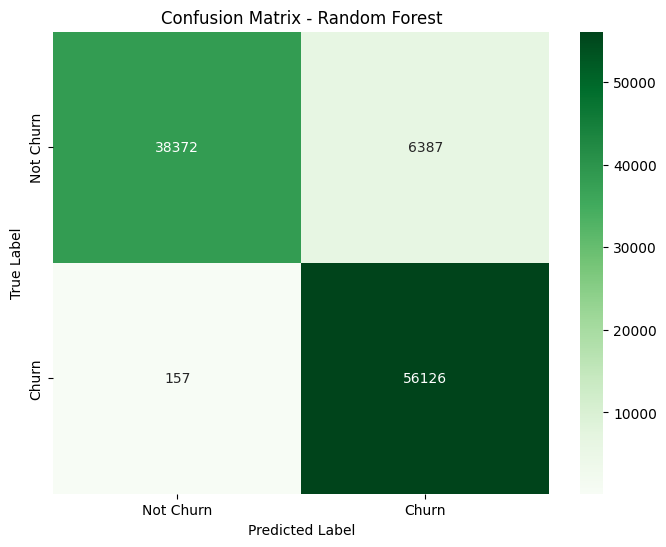

In [55]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(
    random_state=23,
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [65]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("XGBoost Model Performance")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"ROC-AUC:   {roc_auc_xgb:.4f}")

XGBoost Model Performance
Accuracy:  0.9336
Precision: 0.8978
Recall:    0.9938
F1-Score:  0.9434
ROC-AUC:   0.9535


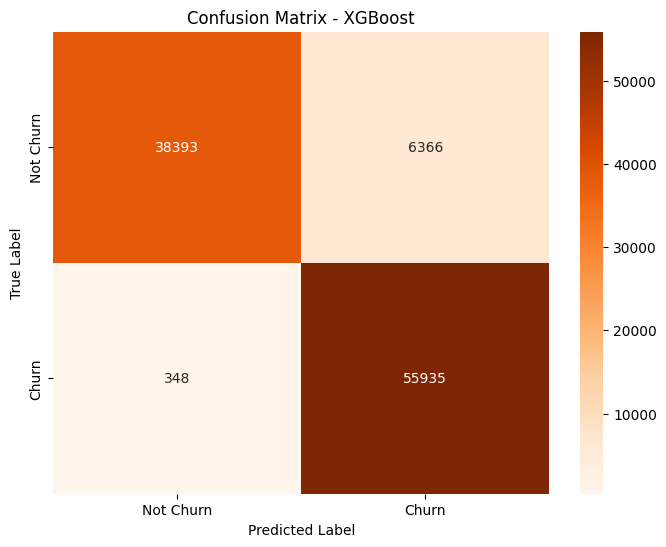

              precision    recall  f1-score   support

 Not Churned       0.99      0.86      0.92     44759
     Churned       0.90      0.99      0.94     56283

    accuracy                           0.93    101042
   macro avg       0.94      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



In [66]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred_xgb, target_names=['Not Churned', 'Churned']))

## Model Comparison

In [64]:
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_xgb],
    'Precision': [precision, precision_rf, precision_xgb],
    'Recall': [recall, recall_rf, recall_xgb],
    'F1-Score': [f1, f1_rf, f1_xgb],
    'ROC-AUC': [roc_auc, roc_auc_rf, roc_auc_xgb]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)
print(comparison_df.to_string(index=False))

              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.8467     0.8741  0.8467    0.8602   0.9077
      Random Forest    0.9352     0.8978  0.9972    0.9449   0.9533
            XGBoost    0.9336     0.8978  0.9938    0.9434   0.9535
